In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    # Read the CSV file into a NumPy array
    data = np.genfromtxt(csv_path, delimiter=',')
    
    # Initialize an empty list to store the final structured data
    structured_data = []
    
    # Group the data by the first column
    unique_first_col_values = np.unique(data[:, 0])
    
    for first_col_value in unique_first_col_values:
        # Extract rows where the first column matches the current unique value
        group_data = data[data[:, 0] == first_col_value][:, 1:]
        
        # Initialize a list to store the sub-groups
        sub_groups = []
        
        # Group the sub-data by the second column
        unique_second_col_values = np.unique(group_data[:, 0])
        
        for second_col_value in unique_second_col_values:
            # Extract rows where the second column matches the current unique value
            sub_group = group_data[group_data[:, 0] == second_col_value][:, 1:]
            sub_groups.append(sub_group)
        
        # Append the sub-groups to the main list
        structured_data.append(sub_groups)
    
    return structured_data


In [2]:
def plot_and_save(paths_XYs, output_image_path):
    colours = ['b']  # Define a list of colors for plotting
    
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    
    ax.set_aspect('equal')
    plt.axis('off')
    plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [3]:
def plot_and_save(paths_XYs, output_image_path):
    colours = ['b']  # Define a list of colors for plotting
    
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    
    ax.set_aspect('equal')
    plt.axis('off')
    plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [8]:
# Read CSV data and plot/save as image
csv_path="frag2.csv" #Enter your csv path here
output_image_path='output.csv'
paths_XYs = read_csv(csv_path)
plot_and_save(paths_XYs, output_image_path)

FileNotFoundError: frag2.csv not found.

In [14]:
import cv2
import numpy as np

def preprocess_image(image_path):
    """ Preprocess the input image for line detection. """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(thresh, 50, 150)

    # Dilate the edges to close gaps
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    return dilated_edges

# Example usage
edges = preprocess_image(output_image_path)  # Use the image generated from Part 1


In [15]:
import cv2
import matplotlib.pyplot as plt

def detect_lines(edges):
    """ Detect lines in the image using Hough Transform. """
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=15, maxLineGap=5)
    return lines

def draw_detected_lines(original_image, lines):
    """ Draw the detected lines on a new image without overwriting the original. """
    line_image = np.zeros_like(original_image)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw in red

    return line_image

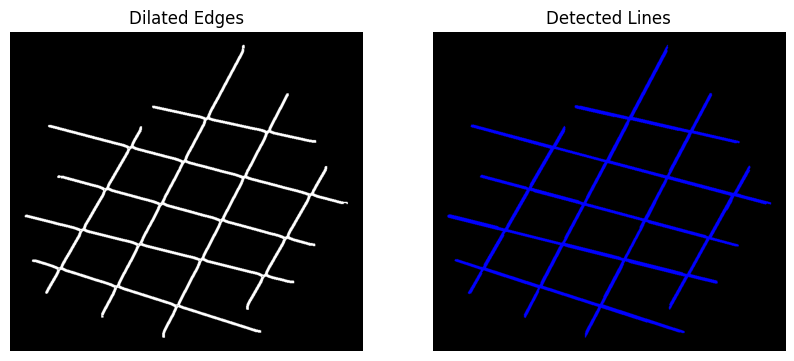

In [16]:
# Example usage
input_image = cv2.imread(output_image_path)  # Load the image from Part 1
lines = detect_lines(edges)  # Detect lines from Part 2

# Draw the detected lines in a new blank image
line_image = draw_detected_lines(input_image, lines)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Dilated Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
